# Homework #3

## Dataset

In this homework, we will use Course Management Platform lead scoring dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

In [138]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
data.shape

(1462, 9)

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [141]:
data.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [142]:
data.nunique()

lead_source                    5
industry                       7
number_of_courses_viewed      10
annual_income               1267
employment_status              4
location                       7
interaction_count             12
lead_score                   101
converted                      2
dtype: int64

In [143]:
data.isna().sum()


lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [144]:
data[data.select_dtypes(include="int64").columns] = (
    data.select_dtypes(include="int64").fillna(0)
)
data.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

## Question 1

What is the most frequent observation (mode) for the column `industry`?

In [145]:
data.industry.mode()

0    retail
Name: industry, dtype: object

In [146]:
data["industry"].value_counts()



industry
retail           203
finance          200
other            198
education        187
healthcare       187
technology       179
manufacturing    174
Name: count, dtype: int64

## Question 2

* Create the correlation matrix for the numerical features of your dataset
* In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset
* What are the two features that have the biggest correlation in this dataset?

In [147]:
data_numeric = data.copy()
data_numeric = data.drop(
    ['lead_source', 'industry','employment_status','location','converted'],
    axis=1
)
data_numeric.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
count,1462.000000,1281.000000,1462.000000,1462.000000
mean,2.031464,59886.273224,2.976744,0.506108
std,1.449717,15070.140389,1.681564,0.288465
min,0.000000,13929.000000,0.000000,0.000000
25%,1.000000,49698.000000,2.000000,0.262500
50%,2.000000,60148.000000,3.000000,0.510000
75%,3.000000,69639.000000,4.000000,0.750000
max,9.000000,109899.000000,11.000000,1.000000


In [148]:
data_numeric.corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.031551,-0.023565,-0.004879
annual_income,0.031551,1.000000,0.048618,0.005334
interaction_count,-0.023565,0.048618,1.000000,0.009888
lead_score,-0.004879,0.005334,0.009888,1.000000


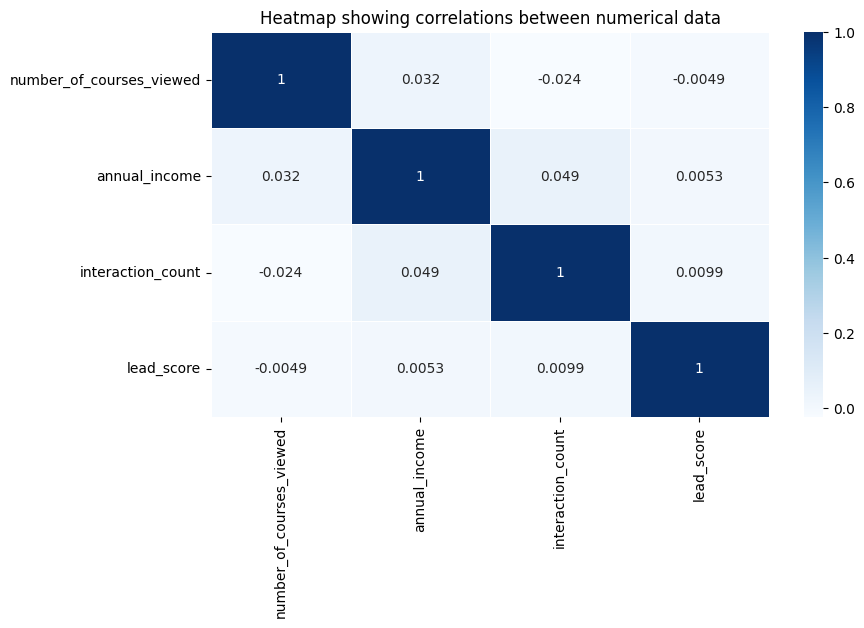

In [149]:
plt.figure(figsize=(9, 5))
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [150]:
data_numeric.corr().unstack().sort_values(ascending=False)


number_of_courses_viewed  number_of_courses_viewed    1.000000
annual_income             annual_income               1.000000
lead_score                lead_score                  1.000000
interaction_count         interaction_count           1.000000
annual_income             interaction_count           0.048618
interaction_count         annual_income               0.048618
annual_income             number_of_courses_viewed    0.031551
number_of_courses_viewed  annual_income               0.031551
lead_score                interaction_count           0.009888
interaction_count         lead_score                  0.009888
annual_income             lead_score                  0.005334
lead_score                annual_income               0.005334
                          number_of_courses_viewed   -0.004879
number_of_courses_viewed  lead_score                 -0.004879
                          interaction_count          -0.023565
interaction_count         number_of_courses_viewed   -0

`number_of_courses_viewed` and `interaction_count`

## Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`
* Make sure that the target value `y` is not in your dataframe

In [151]:
SEED = 42

In [152]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [153]:
len(df_train), len(df_test), len(df_val)

(876, 293, 293)

In [154]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [155]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

## Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only
* Round the scores to 2 decimals using `round(score, 2)`
* Which of these variables has the biggest score?

In [156]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.converted)

In [157]:
cat = ['lead_source', 'industry', 'employment_status', 'location']
numeric = ['number_of_courses_viewed', 'annual_income', 'interaction_count',
       'lead_score']

In [158]:
df_mi = df_train[cat].fillna('NA').apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
lead_source,0.035396
employment_status,0.012938
industry,0.011575
location,0.004464


`lead_source` has the biggest score.

In [159]:
df_train = df_train.drop('converted', axis=1)
df_val = df_val.drop('converted', axis=1)
df_test = df_test.drop('converted', axis=1)

assert 'converted' not in df_train.columns
assert 'converted' not in df_val.columns
assert 'converted' not in df_test.columns

## Question 4

* Now let's train a logistic regression
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding
* Fit the model on the training dataset:
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

```
model = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42
)
```
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits

In [160]:
df_train[cat] = df_train[cat].fillna('NA')
df_train[numeric] = df_train[numeric].fillna(0)

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

In [161]:
model = LogisticRegression(
    C=1.0,
    max_iter=10000,
    random_state=42
)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [162]:
df_val[cat] = df_val[cat].fillna('NA')
df_val[numeric] = df_val[numeric].fillna(0)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [163]:
original_score = accuracy_score(y_val, y_pred)
original_score

0.856655290102389

In [123]:
accuracy = np.round(original_score, 2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.86


## Question 5

* Let's find the least useful feature using the _feature elimination_ technique
* Train a model with all these features (using the same parameters as in Q4)
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature
* Which of following feature has the smallest difference?
    - 'industry',
    - 'employment_status',
    - 'lead_score'
* Round your answer to 2 decimal digits
    
> **note:** the difference doesn't have to be positive

In [128]:
features = df_train.columns.to_list()
eliminate = cat

In [129]:
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in eliminate:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient="records")
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(
        C=1,
        max_iter=10000,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]
    

In [130]:
scores

,eliminated_feature,accuracy,difference
0,lead_source,0.843003,0.013652
1,industry,0.836177,0.020478
2,employment_status,0.832765,0.023891
3,location,0.843003,0.013652


In [131]:
scores[scores.index == scores.difference.idxmin()]


,eliminated_feature,accuracy,difference
0,lead_source,0.843003,0.013652


industry (closely followed by employment_status)

## Question 6

* Now let's train a regularized logistic regression
* Let's try the following values of the parameter `C`: `[0, 0.01, 0.1, 1, 10]`
* Train models using all the features as in Q4
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits
* Which of these `C` leads to the best accuracy on the validation set?
> **note:** If there are multiple options, select the smallest `C`.

In [164]:
df_train[cat] = df_train[cat].fillna('NA')
df_train[numeric] = df_train[numeric].fillna(0)

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

In [192]:
c_test = [0.01, 0.1, 0.5, 1, 5, 10, 15, 100]

In [193]:
scores = {}
for c_try in c_test:

    model = LogisticRegression(
        C= c_try,
        max_iter=10000,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    scores[c_try] = round(score, 3)
    print(f'C = {c_try}:\t Accuracy = {score}')
    

C = 0.01:	 Accuracy = 0.8122866894197952
C = 0.1:	 Accuracy = 0.8430034129692833
C = 0.5:	 Accuracy = 0.8532423208191127
C = 1:	 Accuracy = 0.856655290102389
C = 5:	 Accuracy = 0.8532423208191127
C = 10:	 Accuracy = 0.8532423208191127
C = 15:	 Accuracy = 0.8532423208191127
C = 100:	 Accuracy = 0.8532423208191127


In [194]:
scores

{0.01: 0.812,
 0.1: 0.843,
 0.5: 0.853,
 1: 0.857,
 5: 0.853,
 10: 0.853,
 15: 0.853,
 100: 0.853}

In [195]:
print(f'The best `C` is {max(scores, key=scores.get)}.')


The best `C` is 1.


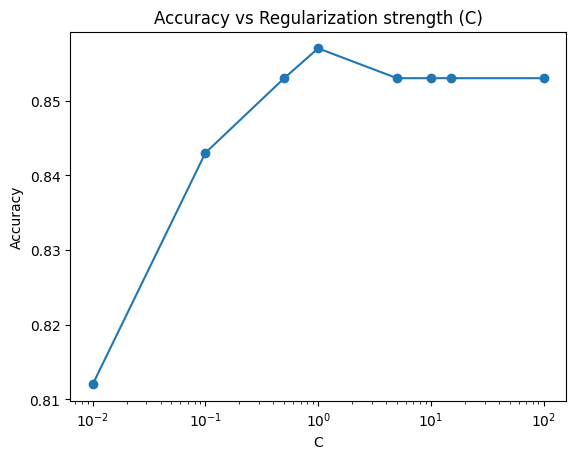

In [196]:
C_values = list(scores.keys())
accuracy_values = list(scores.values())

import matplotlib.pyplot as plt

plt.plot(C_values, accuracy_values, marker='o')
plt.xscale('log')  # muy importante para C
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization strength (C)')
plt.show()
